In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
# import data
df = pd.read_csv("https://raw.githubusercontent.com/gitasanita/HealthyLifestyle/main/healthy_lifestyle_city_2021.csv")
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


# 3 cluster

In [3]:
# Memastikan semua kolom di dalam daftar `keep` ada di DataFrame
df2 = df.loc[:,['City', 'Sunshine hours(City)', 'Pollution(Index score) (City)', 'Outdoor activities(City)']]
df2.head(5)

,City,Sunshine hours(City),Pollution(Index score) (City),Outdoor activities(City)
0,Amsterdam,1858,30.93,422
1,Sydney,2636,26.86,406
2,Vienna,1884,17.33,132
3,Stockholm,1821,19.63,129
4,Copenhagen,1630,21.24,154


In [4]:
# Menghapus baris dengan nilai '-' di kolom 'Sunshine hours(City)'
df2 = df2[df2['Sunshine hours(City)'] != '-']
# Mengubah tipe data kolom Sunshine hours(City) menjadi int
df2['Sunshine hours(City)'] = df2['Sunshine hours(City)'].astype(int)

# Menghapus baris dengan nilai '-' di kolom 'Pollution(Index score) (City)'
df2 = df2[df2['Pollution(Index score) (City)'] != '-']
# Mengubah tipe data kolom 'Pollution(Index score) (City)' menjadi float
df2['Pollution(Index score) (City)'] = df2['Pollution(Index score) (City)'].astype(float)

In [5]:
# Drop data kategorik
df_droped2 = df2.drop(['City'], axis=1)
x2 = np.asarray(df_droped2)

# K-means

In [6]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

#daftar berisi nilai SSE untuk setiap k
sse = []
for k in range(1, 11) :
    km = KMeans(n_clusters = k, **kmeans_kwargs)
    km = km.fit(x2)
    sse.append(km.inertia_)

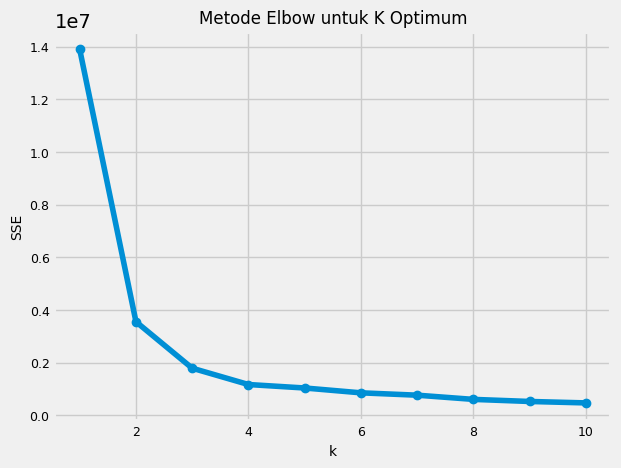

In [7]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse, 'o-')
plt.xlabel('k', size = 10)
plt.ylabel('SSE', size = 10)
plt.title('Metode Elbow untuk K Optimum', size = 12)
plt.xticks(size = 9)
plt.yticks(size = 9)
plt.show()

In [8]:
! pip install kneed
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve = "convex", direction = "decreasing"
)

kl.elbow

3

In [9]:
model_kmeans = KMeans(n_clusters = 3)
model_kmeans.fit(x2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

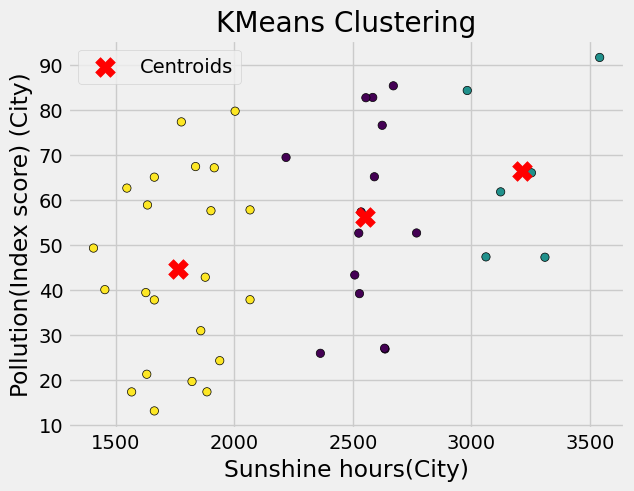

In [10]:
# Mendapatkan pusat cluster
centers3 = model_kmeans.cluster_centers_
labels3 = model_kmeans.labels_
# Visualisasi hasil clustering
plt.scatter(x2[:, 0], x2[:, 1], c=labels3, cmap='viridis', edgecolors='k')
plt.scatter(centers3[:, 0], centers3[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Sunshine hours(City)')
plt.ylabel('Pollution(Index score) (City)')
plt.legend()
plt.show()

In [11]:
# evaluasi model
print("Davies Bouldin 3 Cluster :",davies_bouldin_score(x2, model_kmeans.labels_))

Davies Bouldin 3 Cluster : 0.4929632988795735


In [12]:
# Evaluate with Silhouette Score
silhouette_avg = silhouette_score(x2, model_kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6127276817601688


In [13]:
from mpl_toolkits.mplot3d import Axes3D

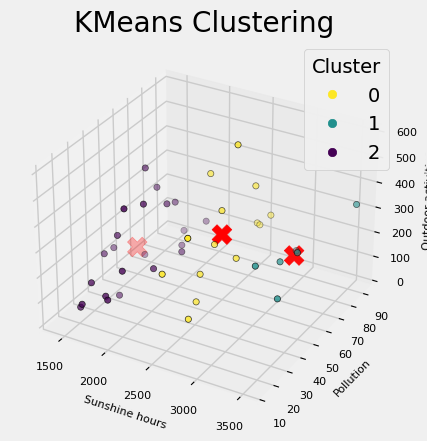

In [14]:
# Visualisasi hasil clustering dalam scatter plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting data dengan label cluster
scatter = ax.scatter(x2[:, 0], x2[:, 1], x2[:, 2], c=labels3, cmap='viridis_r', edgecolors='k')

# Menambahkan label sumbu dengan ukuran tulisan yang lebih kecil
ax.set_xlabel('Sunshine hours', fontsize=8, labelpad=2)  # labelpad menentukan jarak antara label dan sumbu
ax.set_ylabel('Pollution', fontsize=8, labelpad=2)
ax.set_zlabel('Outdoor activities', fontsize=8, labelpad=2)

# Menambahkan legenda untuk label cluster
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)

# Menampilkan pusat cluster dengan marker X berwarna merah
ax.scatter(centers3[:, 0], centers3[:, 1], centers3[:, 2], c='red', marker='X', s=200, label='Centroids')

# Menyusun ukuran tulisan di sumbu x, y, dan z
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='z', labelsize=8)

plt.title('KMeans Clustering')
plt.show()


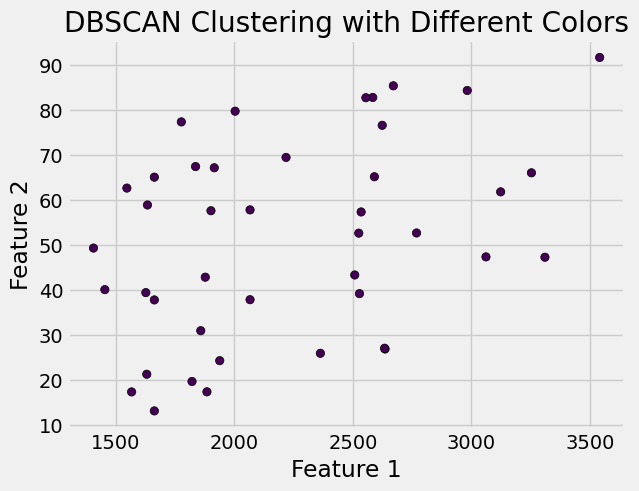

In [15]:
from sklearn.cluster import DBSCAN
# Lakukan DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels_db = dbscan.fit_predict(x2)

# Visualisasi hasil clustering dengan perbedaan warna cluster
plt.scatter(x2[:, 0], x2[:, 1], c=labels_db, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering with Different Colors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
df2['Cluster'] = model_kmeans.labels_
df2

,City,Sunshine hours(City),Pollution(Index score) (City),Outdoor activities(City),Cluster
0,Amsterdam,1858,30.93,422,2
1,Sydney,2636,26.86,406,0
2,Vienna,1884,17.33,132,2
3,Stockholm,1821,19.63,129,2
4,Copenhagen,1630,21.24,154,2
5,Helsinki,1662,13.08,113,2
7,Berlin,1626,39.41,254,2
8,Barcelona,2591,65.19,585,0
9,Vancouver,1938,24.26,218,2
10,Melbourne,2363,25.90,243,0


In [17]:
# Eksport to download if in colab
from google.colab import files

file_cluster = df2.to_excel('GREENTECH_SOLUTION(KMEANS).xlsx', sheet_name='predict')
files.download('GREENTECH_SOLUTION(KMEANS).xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>